In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import json

In [2]:
agents = np.load("/Users/simonblaue/ownCloud/Master/NLDHO/vicsek-data-assimilation/saves/Baseline/1_filter.npy")
agents.shape

(50, 50, 3)

In [29]:
experiment = 'Baseline'

In [54]:
def get_params_metrics(experiment):
    basepath = f'./saves/{experiment}'
    
    with open(f'{basepath}/params.json') as paramfile:
        params = json.load(paramfile)

    with open(f'{basepath}/metrics.json') as metricfile:
        metrics = json.load(metricfile)
        
    return params,metrics

def plot_metric(ax,experiment,metric='Average Hungarian Precision',legend=True):
    p,m = get_params_metrics(experiment)
    
    x = np.arange(0,round(p['steps']/p['timestepsize']),p['sampling_rate']*p['timestepsize'])
    y = m[metric]
    
    label = f"Ensembles={p['ensembles']}"
    
    ax.plot(x,y,label=label)
    ax.set_xlabel('Time')
    
    if legend:
        ax.legend()
    
    return None


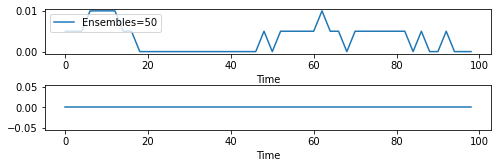

In [56]:
fig = plt.figure(figsize=(8,6))

gs = gridspec.GridSpec(nrows=2, ncols=1, bottom=0.6, hspace=0.7)

axs = [0]*2

axs[0] = fig.add_subplot(gs[0])
axs[1] = fig.add_subplot(gs[1])

plot_metric(axs[0],experiment)
plot_metric(axs[1],experiment,'Average LPP',legend=False)

In [13]:
params

{'name': 'Baseline',
 'seeds': [1, 2],
 'steps': 100,
 'timestepsize': 1,
 'particles': 100,
 'ensembles': 50,
 'observation_noise': 0.0001,
 'viscec_noise': 0.5,
 'xi': 0.8,
 'velocities': [0.03],
 'sampling_rate': 2,
 'alignment_radius': 1.0,
 'observable_axis': [True, True, False],
 'x_axis': 10,
 'y_axis': 10,
 'total_runtime': 11.042553901672363}